# Comparing SSA distribution realizations with GF solutions

In [25]:
import scipy.stats as stats
import numpy as np
import pickle
import pandas as pd

# plotting 
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 15,'font.family': 'Arial'})

In [26]:
# load in results
with open('./ssa_density_dict_small','rb') as file:
    results_dict = pickle.load(file)

In [27]:
eps = 1e-18
def get_hellinger(p,q):
    p = p.flatten()
    q = q.flatten()
    p_sqrt = np.sqrt(p)
    q_sqrt = np.sqrt(q)
    a = (p_sqrt-q_sqrt)**2
    b = np.sqrt(np.sum(a))
    
    return (1/(np.sqrt(2)))*b

# def get_kld(p,q):
#     p = p/p.sum()
#     q = q/q.sum()
#     p = p.flatten()
#     q = q.flatten()
#     kld = np.sum( p*np.log(p/q + eps) )
#     return kld


In [28]:
hell_dict = {'10': np.ones(100),
            '100': np.ones(100),
            '1000': np.ones(100),
            '10000': np.ones(100),
            '100000': np.ones(100),
            }

for i in range(100):
    key = f'param_{i}'
    rd_ = results_dict[key]
    lim_ = rd_[f'Density_10'].shape
    pmf_ = rd_[f'PMF_QV20'][:lim_[0],:lim_[1]]

    for num_traj in [10,100,1000,10000,100000]:
        ssa_dens_ = rd_[f'Density_{num_traj}'][:lim_[0],:lim_[1]]
        hell_dict[f'{num_traj}'][i] = get_hellinger(pmf_,ssa_dens_)


In [29]:
def plot_cdf(list_of_arrays,labels,colors):
    
    for idx, array in enumerate(list_of_arrays):
        sorted_array = np.sort(array)
        cdf = np.linspace(0, 1, len(sorted_array))
        plt.plot(sorted_array, cdf, label=labels[idx] if labels else f"Array {idx+1}",
                color = colors[idx],linewidth = 4.0,alpha=0.7)


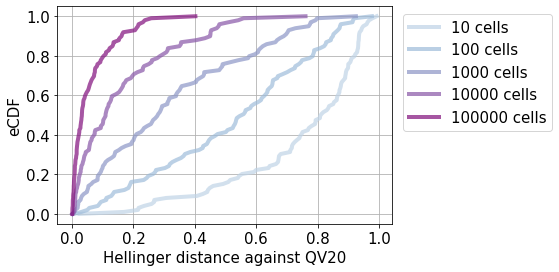

In [33]:
colors = ['#bfd3e6','#9ebcda','#8c96c6','#8856a7','#810f7c']
plot_cdf([hell_dict[key] for key in hell_dict.keys()],
          [f'{i} cells' for i in [10,100,1000,10000,100000]],
          colors)
plt.legend(bbox_to_anchor=(1.01, 1.))
plt.grid()
plt.xlabel('Hellinger distance against QV20',fontsize=15)
plt.ylabel('eCDF',fontsize=15)
plt.savefig('./eCDF_SSAvsGF.png',dpi=400,bbox_inches='tight')

In [31]:
plot_df = pd.DataFrame(hell_dict)

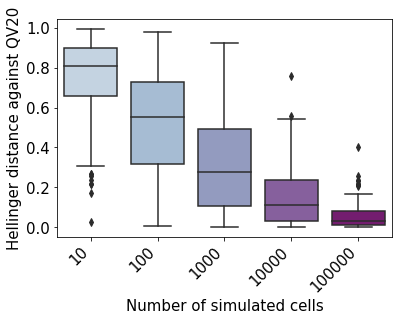

In [34]:
sns.boxplot(data = plot_df.melt(), x = 'variable', y ='value', palette = colors)

plt.xticks(rotation=45,ha='right')
plt.xlabel('Number of simulated cells',fontsize=15)
plt.ylabel('Hellinger distance against QV20',fontsize=15)


plt.savefig('./box_SSAvsGF.png',dpi=400,bbox_inches='tight')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


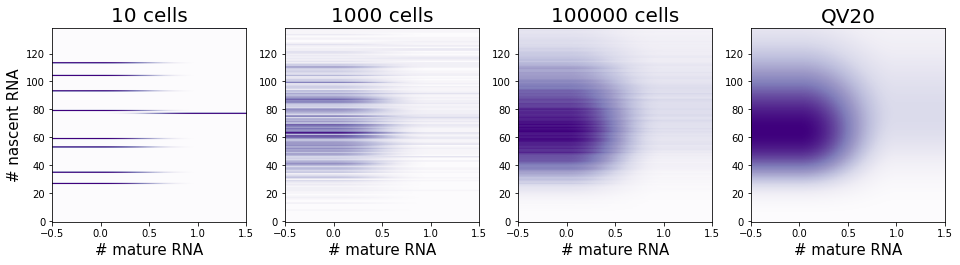

In [10]:
ind = 5

rd_ = results_dict[f'param_{ind}']
lim_ = rd_['Density_10'].shape
fig,ax = plt.subplots(1,4,figsize = (16,4))
ax[0].set_ylabel('# nascent RNA',fontsize=15)
for i,lab in enumerate(['Density_10',
                        'Density_1000',
                        'Density_100000',
                        'PMF_QV20']):

    
    ax[i].imshow(( rd_[lab][:lim_[0],:lim_[1]] + eps),
          aspect= lim_[1]/lim_[0], cmap = 'Purples')
    ax[i].invert_yaxis()
    ax[i].set_title('')
    ax[i].set_xlabel('# mature RNA',fontsize=15)
    if i !=3:
        ax[i].set_title(lab.split('_')[1] + ' cells',fontsize=20)
    elif i == 3: 
        ax[i].set_title(lab.split('_')[1]  ,fontsize=20)
    
    
plt.savefig(f'./param_{ind}_SSAvsGF.png',dpi=450,bbox_inches='tight');

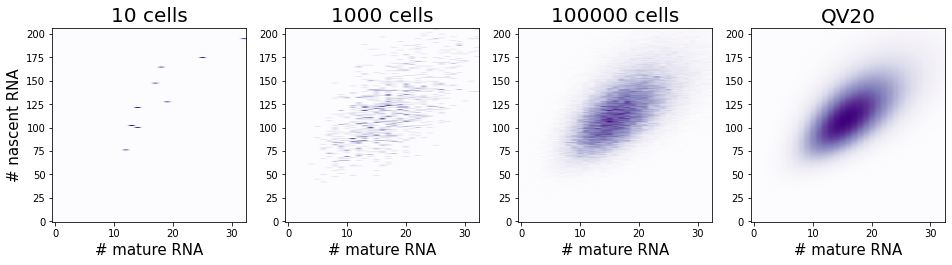

In [11]:
ind = 11

rd_ = results_dict[f'param_{ind}']
lim_ = rd_['Density_10'].shape
fig,ax = plt.subplots(1,4,figsize = (16,4))
ax[0].set_ylabel('# nascent RNA',fontsize=15)
for i,lab in enumerate(['Density_10',
                        'Density_1000',
                        'Density_100000',
                        'PMF_QV20']):

    
    ax[i].imshow(( rd_[lab][:lim_[0],:lim_[1]] + eps),
          aspect= lim_[1]/lim_[0], cmap = 'Purples')
    ax[i].invert_yaxis()
    ax[i].set_title('')
    ax[i].set_xlabel('# mature RNA',fontsize=15)
    if i !=3:
        ax[i].set_title(lab.split('_')[1] + ' cells',fontsize=20)
    elif i == 3: 
        ax[i].set_title(lab.split('_')[1]  ,fontsize=20)
plt.savefig(f'./param_{ind}_SSAvsGF.png',dpi=450,bbox_inches='tight');

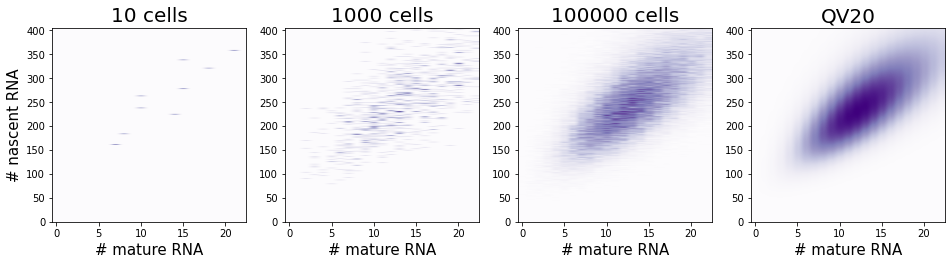

In [13]:
ind = 24

rd_ = results_dict[f'param_{ind}']
lim_ = rd_['Density_10'].shape
fig,ax = plt.subplots(1,4,figsize = (16,4))
ax[0].set_ylabel('# nascent RNA',fontsize=15)
for i,lab in enumerate(['Density_10',
                        'Density_1000',
                        'Density_100000',
                        'PMF_QV20']):

    
    ax[i].imshow(( rd_[lab][:lim_[0],:lim_[1]] + eps),
          aspect= lim_[1]/lim_[0], cmap = 'Purples')
    ax[i].invert_yaxis()
    ax[i].set_title('')
    ax[i].set_xlabel('# mature RNA',fontsize=15)
    if i !=3:
        ax[i].set_title(lab.split('_')[1] + ' cells',fontsize=20)
    elif i == 3: 
        ax[i].set_title(lab.split('_')[1]  ,fontsize=20)
    
    
plt.savefig(f'./param_{ind}_SSAvsGF.png',dpi=450,bbox_inches='tight');